In [126]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [127]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [128]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [129]:
from bs4 import BeautifulSoup as soup
from datetime import date,datetime
from urllib.request import Request,urlopen
import pandas as pd
import numpy as np

In [130]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import seaborn as sns
import gc
import folium
from folium import plugins
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

In [131]:

url="https://www.worldometers.info/coronavirus/#countries"
req=Request(url,headers={'User-Agent': "Google Chrome/91.0.4472.114"})
webpage=urlopen(req)
page_soup=soup(webpage,"html.parser")

In [132]:
today=datetime.now()
yesterday_str="%s %d, %d"%(date.today().strftime("%b"),today.day-1,today.year)
yesterday_str
                            
                    

'Aug 4, 2021'

In [133]:
table=page_soup.findAll("table",{"id":"main_table_countries_yesterday"})
containers=table[0].findAll("tr",{"style":""})
title=containers[0]
del containers[0]
clean=True
all_data =[]


In [134]:
table=page_soup.findAll("table",{"id":"main_table_countries_yesterday"})
containers=table[0].findAll("tr",{"style":""})
title=containers[0]
del containers[0]
clean=True
all_data =[]
for country in containers:
    country_data=[]
    country_container=country.findAll("td")
    
    if country_container[1].text=="china":
        continue
    for i in range(1,len(country_container)):
        final_feature=country_container[i].text
        
        if clean:
            if i!=1 and i!=len(country_container)-1:
                final_feature=final_feature.replace(",","")
                
                if final_feature.find('+')!= -1:
                    final_feature=final_feature.replace("+","")
                    final_feature=float(final_feature)
                elif final_feature.find("-") != -1:
                    final_feature=final_feature.replace("-","")
                    final_feature=float(final_feature)*-1
        if final_feature== 'N/A':
            final_feature=0
        elif final_feature =="" or final_feature ==" ":
            final_feature =-1
                                                        
                                                        
        country_data.append(final_feature)
                                                        
    all_data.append(country_data)                        
                                     

In [135]:
#Uncomment this if you want to see what all_data contains
#all_data

In [136]:
df=pd.DataFrame(all_data)
df.drop([15,16,17,18,19,20],inplace=True, axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,World,200936451,683851.0,4269042,10117.0,180952442,439891.0,15714967,93794,25778,547.7,-1,-1,-1,All
1,China,93289,96.0,4636,-1.0,87413,13.0,1240,21,65,3,160000000,111163,1439323776,Asia
2,USA,36176471,112279.0,631299,656.0,29787316,28186.0,5757856,12705,108599,1895,540382349,1622187,333119610,North America
3,India,31810782,42817.0,426321,532.0,30967223,41875.0,417238,8944,22807,306,473142307,339221,1394790627,Asia
4,Brazil,20026533,40460.0,559715,1118.0,18800884,54019.0,665934,8318,93492,2613,55034721,256923,214206978,South America


In [137]:
column_labels=["Country","Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","New Recovered","Active Cases","Serious/Critical","Total Cases/1M","Deaths/1M","Total Tests","Test/1M","Population","Continent"]
df.columns = column_labels

In [138]:
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,Continent
0,World,200936451,683851.0,4269042,10117.0,180952442,439891.0,15714967,93794,25778,547.7,-1,-1,-1,All
1,China,93289,96.0,4636,-1.0,87413,13.0,1240,21,65,3,160000000,111163,1439323776,Asia
2,USA,36176471,112279.0,631299,656.0,29787316,28186.0,5757856,12705,108599,1895,540382349,1622187,333119610,North America
3,India,31810782,42817.0,426321,532.0,30967223,41875.0,417238,8944,22807,306,473142307,339221,1394790627,Asia
4,Brazil,20026533,40460.0,559715,1118.0,18800884,54019.0,665934,8318,93492,2613,55034721,256923,214206978,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Macao,63,4.0,-1,-1.0,54,-1.0,9,-1,96,-1,4671,7088,658974,Asia
210,Saint Pierre Miquelon,28,-1.0,-1,-1.0,26,-1.0,2,-1,4859,-1,6128,1063335,5763,North America
211,Montserrat,21,-1.0,1,-1.0,19,-1.0,1,-1,4204,200,1408,281882,4995,North America
212,Western Sahara,10,-1.0,1,-1.0,8,-1.0,1,-1,16,2,-1,-1,613291,Africa


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           212 non-null    object 
 1   Total Cases       212 non-null    float64
 2   New Cases         212 non-null    float64
 3   Total Deaths      212 non-null    float64
 4   New Deaths        212 non-null    float64
 5   Total Recovered   212 non-null    float64
 6   New Recovered     212 non-null    float64
 7   Active Cases      212 non-null    float64
 8   Serious/Critical  212 non-null    int64  
 9   Total Cases/1M    212 non-null    float64
 10  Deaths/1M         212 non-null    float64
 11  Total Tests       212 non-null    float64
 12  Test/1M           212 non-null    float64
 13  Population        212 non-null    float64
 14  Continent         212 non-null    object 
 15  %Inc Cases        212 non-null    float64
 16  %Inc Deaths       212 non-null    float64
 1

In [140]:
df.columns


Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious/Critical',
       'Total Cases/1M', 'Deaths/1M', 'Total Tests', 'Test/1M', 'Population',
       'Continent'],
      dtype='object')

In [141]:
df.describe()

,New Cases,New Deaths,New Recovered
count,214.000000,214.000000,214.000000
mean,9586.518692,141.406542,6166.434579
std,66454.600055,986.189036,42699.112075
min,-1.000000,-1.000000,-1.000000
25%,8.000000,-1.000000,-1.000000
50%,181.000000,2.000000,89.000000
75%,1118.750000,15.750000,1020.000000
max,683851.000000,10117.000000,439891.000000


In [142]:
df.shape

(214, 15)

In [143]:
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of      Country  Total Cases  New Cases  Total Deaths  New Deaths  \
0      False        False      False         False       False   
1      False        False      False         False       False   
2      False        False      False         False       False   
3      False        False      False         False       False   
4      False        False      False         False       False   
..       ...          ...        ...           ...         ...   
209    False        False      False         False       False   
210    False        False      False         False       False   
211    False        False      False         False       False   
212    False        False      False         False       False   
213    False        False      False         False       False   

     Total Recovered  New Recovered  Active Cases  Serious/Critical  \
0              False          False         False             False   
1  

In [144]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Country  Total Cases  New Cases  Total Deaths  New Deaths  \
0      False        False      False         False       False   
1      False        False      False         False       False   
2      False        False      False         False       False   
3      False        False      False         False       False   
4      False        False      False         False       False   
..       ...          ...        ...           ...         ...   
209    False        False      False         False       False   
210    False        False      False         False       False   
211    False        False      False         False       False   
212    False        False      False         False       False   
213    False        False      False         False       False   

     Total Recovered  New Recovered  Active Cases  Serious/Critical  \
0              False          False         False             False   
1  

In [145]:
#rel= df[["Total Cases", "Population","Active Cases"]].loc[3]
#rel_df = pd.DataFrame(rel).reset_index()

#sns.relplot( x= "Population",y= "Total Cases",kind="line", data=df)

In [146]:

#Generates Automatic report of trends found in data
from pandas_profiling import ProfileReport
#Here We are only using the first 100 data points
prof = ProfileReport(df.sample(n=100)) 
prof.to_file(output_file='outputreport.html')

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [147]:
for column_label in df.columns:
    if ((column_label != "Country") and (column_label != "Continent")):
        
        df[column_label]=pd.to_numeric(df[column_label])

In [148]:
#adding new col.
df["%Inc Cases"]=df["New Cases"]/df["Total Cases"]*100
df["%Inc Deaths"]=df["New Deaths"]/df["Total Deaths"]*100
df["%Inc Recovered"]=df["New Recovered"]/df["Total Recovered"]*100

In [149]:
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,Continent,%Inc Cases,%Inc Deaths,%Inc Recovered
0,World,200936451,683851.0,4269042,10117.0,180952442,439891.0,15714967.0,93794,25778.0,547.7,-1,-1,-1,All,0.340332,0.236985,0.243098
1,China,93289,96.0,4636,-1.0,87413,13.0,1240.0,21,65.0,3.0,160000000,111163,1439323776,Asia,0.102906,-0.021570,0.014872
2,USA,36176471,112279.0,631299,656.0,29787316,28186.0,5757856.0,12705,108599.0,1895.0,540382349,1622187,333119610,North America,0.310365,0.103913,0.094624
3,India,31810782,42817.0,426321,532.0,30967223,41875.0,417238.0,8944,22807.0,306.0,473142307,339221,1394790627,Asia,0.134599,0.124789,0.135224
4,Brazil,20026533,40460.0,559715,1118.0,18800884,54019.0,665934.0,8318,93492.0,2613.0,55034721,256923,214206978,South America,0.202032,0.199745,0.287322


EDA

In [150]:
cases = df[["Total Cases","Active Cases", "Total Deaths"]].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ["Type","Total"]

#df["Percentage"] = np.round(100*cases_df["Total"]/np.sum(cases_df["Total"]),2)
#df.head()

cases_df["Percentage"] = np.round(100*cases_df["Total"]/np.sum(cases_df["Total"]),2)
cases_df["Virus"] = ["COVID-19" for i in range(len(cases_df))]
cases_df

,Type,Total,Percentage,Virus
0,Total Cases,200936451.0,90.95,COVID-19
1,Active Cases,15714967.0,7.11,COVID-19
2,Total Deaths,4269042.0,1.93,COVID-19


In [151]:
fig = px.bar(cases_df, x = "Virus", y = "Percentage", color = "Type", hover_data = ["Total"])
fig.show()

In [152]:
#For INDIA- data at row 3
cases = df[["New Cases","New Recovered", "New Deaths"]].loc[3]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ["Type","Total"]

#df["Percentage"] = np.round(100*cases_df["Total"]/np.sum(cases_df["Total"]),2)
#df.head()

cases_df["Percentage"] = np.round(100*cases_df["Total"]/np.sum(cases_df["Total"]),2)
cases_df["Virus"] = ["COVID-19" for i in range(len(cases_df))]
cases_df
fig = px.bar(cases_df, x = "Virus", y = "Percentage", color = "Type", hover_data = ["Total"])
fig.show()

In [153]:
fig = px.bar(cases_df, x = "Virus", y = "Percentage", color = "Type", hover_data = ["Total"])
fig.show()

In [154]:
per = np.round(df[["%Inc Cases", "%Inc Deaths", "%Inc Recovered"]].loc[0],2)
per_df= pd.DataFrame(per)
per_df.columns = ["Percentage"]
fig = go.Figure()
fig.add_trace(go.Bar(x = per_df.index , y = per_df["Percentage"], marker_color = ["Yellow", "Blue", "Red"]))
fig.show()

#continent


In [155]:
continent_df = df.groupby("Continent").sum().drop("All")


In [156]:
continent_df = continent_df.reset_index()
continent_df

,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,%Inc Cases,%Inc Deaths,%Inc Recovered
0,Africa,6912035,41735.0,174254,967.0,6034402,33723.0,703379.0,4526,769081.0,11445.3,60541351,5639179,1375453498,17.241801,-104.784956,9.916221
1,Asia,63072781,282492.0,914403,4705.0,58817453,199178.0,3340924.0,35527,1699136.0,16652.9,1113452674,41709502,4646457050,38.668064,33.626674,37.416246
2,Australia/Oceania,111109,1897.0,1570,9.0,81110,1394.0,28428.0,109,117294.0,907.0,28744146,2100812,41430360,5.681999,99.243530,10.653469
3,Europe,51967254,134831.0,1137808,1216.0,47100962,69088.0,3728484.0,8540,3816092.0,70098.0,1092880998,96215756,748122425,12.861382,-58.430407,14.883378
4,North America,43128288,154759.0,944705,1268.0,35587347,59021.0,6596232.0,19747,1537498.0,21010.0,608746470,36723351,594140104,20.434037,0.489382,-0.683692
5,South America,35743757,68099.0,1096272,1862.0,31609299,77431.0,1115790.0,25278,883839.0,24680.0,144675565,7664460,434633290,6.923381,102.489277,0.317070


In [157]:
def continent_visualization(v_list):
    for columns_label in v_list:
        c_df = continent_df[['Continent',columns_label]]
        
        c_df['Percentage'] = np.round(100*c_df[columns_label]/np.sum(c_df[columns_label]),2)
        c_df['Virus'] = ['Covid-19' for i in range (len(c_df))]
        #c_df = c_df.reset_index()
        fig = px.bar(c_df, x = "Virus", y = "Percentage", color = "Continent", hover_data = [columns_label])
        fig.update_layout(title = {"text":f"{columns_label}"})
        fig.show()
        gc.collect()

In [158]:
cases_list = ["Total Cases", "Active Cases", "New Cases", "Serious/Critical","Total Cases/1M"]

deaths_list = ["Total Deaths", "New Deaths", "Deaths/1M"]

recovered_list = ["Total Recovered", "New Recovered", "%Inc Recovered"]


In [159]:
continent_visualization(cases_list)

In [160]:
continent_visualization(deaths_list)

In [161]:
continent_visualization(recovered_list)

In [162]:
df=df.drop([len(df)-1])
country_df = df.drop([0])
country_df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,Continent,%Inc Cases,%Inc Deaths,%Inc Recovered
1,China,93289,96.0,4636,-1.0,87413,13.0,1240.0,21,65.0,3.0,160000000,111163,1439323776,Asia,0.102906,-0.021570,0.014872
2,USA,36176471,112279.0,631299,656.0,29787316,28186.0,5757856.0,12705,108599.0,1895.0,540382349,1622187,333119610,North America,0.310365,0.103913,0.094624
3,India,31810782,42817.0,426321,532.0,30967223,41875.0,417238.0,8944,22807.0,306.0,473142307,339221,1394790627,Asia,0.134599,0.124789,0.135224
4,Brazil,20026533,40460.0,559715,1118.0,18800884,54019.0,665934.0,8318,93492.0,2613.0,55034721,256923,214206978,South America,0.202032,0.199745,0.287322
5,Russia,6356784,22589.0,161715,790.0,5679842,20096.0,515227.0,2300,43539.0,1108.0,166900000,1143129,146002776,Europe,0.355353,0.488514,0.353813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Falkland Islands,66,3.0,-1,-1.0,63,-1.0,3.0,-1,18384.0,-1.0,7409,2063788,3590,South America,4.545455,100.000000,-1.587302
209,Macao,63,4.0,-1,-1.0,54,-1.0,9.0,-1,96.0,-1.0,4671,7088,658974,Asia,6.349206,100.000000,-1.851852
210,Saint Pierre Miquelon,28,-1.0,-1,-1.0,26,-1.0,2.0,-1,4859.0,-1.0,6128,1063335,5763,North America,-3.571429,100.000000,-3.846154
211,Montserrat,21,-1.0,1,-1.0,19,-1.0,1.0,-1,4204.0,200.0,1408,281882,4995,North America,-4.761905,-100.000000,-5.263158


In [163]:
LOOK_AT =5
country = country_df.columns[1:14]
fig=go.Figure()
c=0
for i in country_df.index:
    if c < LOOK_AT:
        fig.add_trace(go.Bar(name = country_df['Country'][i],x = country , y=country_df.loc[i][1:14]))
    else:
        break
    c +=1
fig.update_layout(title = {"text" : f'Top {LOOK_AT} countries affected'}, yaxis_type="log")
fig.show()

In [164]:
#Total Active  is the Total cases - (Number of death + Cured)
df=df.drop([len(df)-1])
Conti_df= df.drop([0])
Conti_df['Active Cases'] = Conti_df['Total Cases'] - (Conti_df['Total Deaths'] + Conti_df['Total Recovered'])
total_active = Conti_df['Active Cases'].sum()
print('Total number of active COVID 19 cases across world:', total_active)

Tot_Cases = Conti_df.groupby('Continent')['Active Cases'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 19 cases across world: 17435638


,Active Cases
Continent,
North America,6596236
Europe,3728484
Asia,3340925
South America,3038186
Africa,703378
Australia/Oceania,28429


In [165]:
##Linear regression

In [166]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [167]:
df["Total Cases"]= (df["Total Cases"] - df["Total Cases"].min())/(df["Total Cases"].max()- df["Total Cases"].min())
df["Total Deaths"]= (df["Total Deaths"] - df["Total Deaths"].min())/(df["Total Deaths"].max()- df["Total Deaths"].min())
df["Total Recovered"]= (df["Total Recovered"] - df["Total Recovered"].min())/(df["Total Recovered"].max()- df["Total Recovered"].min())
df["Test/1M"]= (df["Test/1M"] - df["Test/1M"].min())/(df["Test/1M"].max()- df["Test/1M"].min())
df["Total Tests"]= (df["Total Tests"] - df["Total Tests"].min())/(df["Total Tests"].max()- df["Total Tests"].min())
df["Population"]= (df["Population"] - df["Population"].min())/(df["Population"].max()- df["Population"].min())
df["Active Cases"]= (df["Active Cases"] - df["Active Cases"].min())/(df["Active Cases"].max()- df["Active Cases"].min())

In [168]:
training_features = ["Total Cases", "Total Deaths", "Total Recovered","Test/1M","Total Tests","Population","Active Cases"]
target = 'New Cases'
X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.25,  
                                                   random_state=589)  

In [169]:
from sklearn import linear_model
model = linear_model.LinearRegression()
from sklearn.linear_model import SGDRegressor

In [170]:
model.fit(X_train,Y_train)

LinearRegression()

In [171]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 37834387.99
R Square score: 0.47


In [172]:
# The coefficients
print('Coefficients: \n', model.coef_)
print('Intercept:\n',model.intercept_)

Coefficients: 
 [337164.3410213  -24570.90032086 200351.78095618   2241.68947658
 -30216.09757563  11012.12770761 168323.70469307]
Intercept:
 530.4124179521759


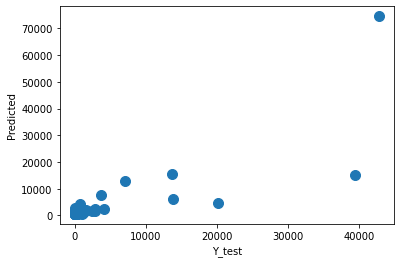

In [173]:
#plt.plot(Y_test, predicted, color='red', linewidth=1)
plt.scatter(Y_test, predicted, s=100)
plt.xlabel('Y_test')
plt.ylabel('Predicted')

plt.show()

In [174]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4,p=2,weights='distance') 

In [175]:
training_features = ["Total Cases", "Total Deaths", "Total Recovered","Test/1M","Total Tests","Population","Active Cases"]
target = 'New Cases'
X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.12,  
                                                   random_state=2)  

In [176]:
model.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [177]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 37053914.22
R Square score: 0.42


In [178]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 37053914.22
R Square score: 0.42


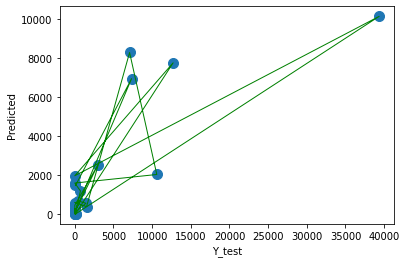

In [179]:
plt.plot(Y_test, predicted, color='green', linewidth=1)
plt.scatter(Y_test, predicted, s=100)
plt.xlabel('Y_test')
plt.ylabel('Predicted')

plt.show()

In [180]:
reg_df = df[["Total Cases", "Total Deaths", "Total Recovered","Test/1M","Total Tests","Population","Active Cases"]]
#reg_df = reg_df.reset_index()


In [181]:
X = reg_df.iloc[:, :-1].values
y = reg_df.iloc[:, :-1].values

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [183]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [184]:
y_pred = regressor.predict(X_test)

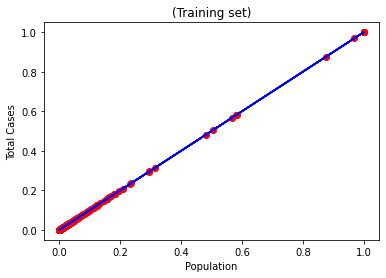

In [185]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Training set)')
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.show()

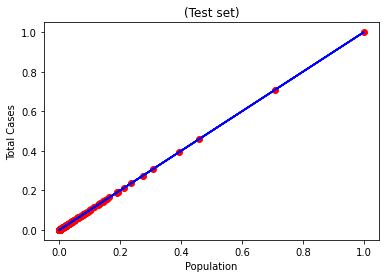

In [186]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Test set)')
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.show()